** A Text to Speech Example: Using features, lets try to build a network, generate wavefile and visualize it in comparision to the original**


Let's install the dependencies.

We need keras for training an NN \\
We need sptk for signal processing \\
We need pyworld for vocoding \\
We need sklearn for preprocessing and metrics




In [141]:
!pip install pyworld
!pip install pysoundfile
!pip install keras
!pip install sklearn



Now lets download the MVP file, extract and navigate inside. 

In [142]:
!rm -rf tts_mvp* MVP
!wget http://tts.speech.cs.cmu.edu/rsk/tts_stuff/tts_mvp_DNNWORLD_18Jan2018.tar.gz
!tar xvzf tts_mvp_DNNWORLD_18Jan2018.tar.gz  

--2018-01-20 00:43:29--  http://tts.speech.cs.cmu.edu/rsk/tts_stuff/tts_mvp_DNNWORLD_18Jan2018.tar.gz
Resolving tts.speech.cs.cmu.edu (tts.speech.cs.cmu.edu)... 128.2.208.89
Connecting to tts.speech.cs.cmu.edu (tts.speech.cs.cmu.edu)|128.2.208.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154484419 (147M) [application/x-gzip]
Saving to: ‘tts_mvp_DNNWORLD_18Jan2018.tar.gz’

tts_mvp_DNNWORLD_18 100%[===================>] 147.33M  11.2MB/s    in 14s     

2018-01-20 00:43:43 (10.9 MB/s) - ‘tts_mvp_DNNWORLD_18Jan2018.tar.gz’ saved [154484419/154484419]

MVP/
MVP/scripts/
MVP/scripts/files.test
MVP/scripts/SPTK-3.9.clone/
MVP/scripts/SPTK-3.9.clone/bin/
MVP/scripts/SPTK-3.9.clone/bin/delta
MVP/scripts/SPTK-3.9.clone/bin/dfs
MVP/scripts/SPTK-3.9.clone/bin/lpc
MVP/scripts/SPTK-3.9.clone/bin/wavsplit
MVP/scripts/SPTK-3.9.clone/bin/mgc2sp
MVP/scripts/SPTK-3.9.clone/bin/sopr
MVP/scripts/SPTK-3.9.clone/bin/rmse
MVP/scripts/SPTK-3.9.clone/bin/train
MVP/scripts/SPTK-3.

MVP/data/output_full/arctic_a0317.ccoeffs
MVP/data/output_full/arctic_a0200.ccoeffs
MVP/data/output_full/arctic_b0541.ccoeffs
MVP/data/output_full/arctic_a0173.ccoeffs
MVP/data/output_full/arctic_a0062.ccoeffs
MVP/data/output_full/arctic_a0543.ccoeffs
MVP/data/output_full/arctic_b0475.ccoeffs
MVP/data/output_full/arctic_a0275.ccoeffs
MVP/data/output_full/arctic_a0259.ccoeffs
MVP/data/output_full/arctic_b0329.ccoeffs
MVP/data/output_full/arctic_a0037.ccoeffs
MVP/data/output_full/arctic_a0452.ccoeffs
MVP/data/output_full/arctic_a0245.ccoeffs
MVP/data/output_full/arctic_b0027.ccoeffs
MVP/data/output_full/arctic_b0349.ccoeffs
MVP/data/output_full/arctic_b0082.ccoeffs
MVP/data/output_full/arctic_a0050.ccoeffs
MVP/data/output_full/arctic_b0377.ccoeffs
MVP/data/output_full/arctic_a0472.ccoeffs
MVP/data/output_full/arctic_a0585.ccoeffs
MVP/data/output_full/arctic_a0038.ccoeffs
MVP/data/output_full/arctic_a0083.ccoeffs
MVP/data/output_full/arctic_b0232.ccoeffs
MVP/data/output_full/arctic_b0227.

MVP/data/output_full/arctic_a0332.ccoeffs
MVP/data/output_full/arctic_a0100.ccoeffs
MVP/data/output_full/arctic_b0322.ccoeffs
MVP/data/output_full/arctic_a0491.ccoeffs
MVP/data/output_full/arctic_b0483.ccoeffs
MVP/data/output_full/arctic_b0512.ccoeffs
MVP/data/output_full/arctic_a0145.ccoeffs
MVP/data/output_full/arctic_a0141.ccoeffs
MVP/data/output_full/arctic_b0110.ccoeffs
MVP/data/output_full/arctic_a0499.ccoeffs
MVP/data/output_full/arctic_a0278.ccoeffs
MVP/data/output_full/arctic_b0505.ccoeffs
MVP/data/output_full/arctic_b0423.ccoeffs
MVP/data/output_full/arctic_b0446.ccoeffs
MVP/data/output_full/arctic_b0097.ccoeffs
MVP/data/output_full/arctic_b0255.ccoeffs
MVP/data/output_full/arctic_b0173.ccoeffs
MVP/data/output_full/arctic_b0397.ccoeffs
MVP/data/output_full/arctic_a0394.ccoeffs
MVP/data/output_full/arctic_b0076.ccoeffs
MVP/data/output_full/arctic_a0055.ccoeffs
MVP/data/output_full/arctic_a0070.ccoeffs
MVP/data/output_full/arctic_a0470.ccoeffs
MVP/data/output_full/arctic_b0055.

MVP/data/output_full/arctic_b0467.ccoeffs
MVP/data/output_full/arctic_b0360.ccoeffs
MVP/data/output_full/arctic_b0182.ccoeffs
MVP/data/output_full/arctic_b0381.ccoeffs
MVP/data/output_full/arctic_a0497.ccoeffs
MVP/data/output_full/arctic_a0474.ccoeffs
MVP/data/output_full/arctic_a0260.ccoeffs
MVP/data/output_full/arctic_b0463.ccoeffs
MVP/data/output_full/arctic_b0140.ccoeffs
MVP/data/output_full/arctic_a0162.ccoeffs
MVP/data/output_full/arctic_a0381.ccoeffs
MVP/data/output_full/arctic_a0535.ccoeffs
MVP/data/output_full/arctic_a0086.ccoeffs
MVP/data/output_full/arctic_a0020.ccoeffs
MVP/data/output_full/arctic_a0257.ccoeffs
MVP/data/output_full/arctic_b0195.ccoeffs
MVP/data/output_full/arctic_b0024.ccoeffs
MVP/data/output_full/arctic_a0584.ccoeffs
MVP/data/output_full/arctic_a0285.ccoeffs
MVP/data/output_full/arctic_b0170.ccoeffs
MVP/data/output_full/arctic_b0028.ccoeffs
MVP/data/output_full/arctic_b0276.ccoeffs
MVP/data/output_full/arctic_a0248.ccoeffs
MVP/data/output_full/arctic_a0211.

MVP/data/output_full/arctic_b0418.ccoeffs
MVP/data/output_full/arctic_a0159.ccoeffs
MVP/data/output_full/arctic_b0079.ccoeffs
MVP/data/output_full/arctic_a0540.ccoeffs
MVP/data/output_full/arctic_b0424.ccoeffs
MVP/data/output_full/arctic_a0416.ccoeffs
MVP/data/output_full/arctic_b0430.ccoeffs
MVP/data/output_full/arctic_b0029.ccoeffs
MVP/data/output_full/arctic_a0106.ccoeffs
MVP/data/output_full/arctic_a0115.ccoeffs
MVP/data/output_full/arctic_a0365.ccoeffs
MVP/data/output_full/arctic_b0219.ccoeffs
MVP/data/output_full/arctic_a0455.ccoeffs
MVP/data/output_full/arctic_a0468.ccoeffs
MVP/data/output_full/arctic_a0011.ccoeffs
MVP/data/output_full/arctic_a0516.ccoeffs
MVP/data/output_full/arctic_a0152.ccoeffs
MVP/data/output_full/arctic_a0443.ccoeffs
MVP/data/output_full/arctic_a0389.ccoeffs
MVP/data/output_full/arctic_b0333.ccoeffs
MVP/data/output_full/arctic_b0065.ccoeffs
MVP/data/output_full/arctic_a0221.ccoeffs
MVP/data/output_full/arctic_b0450.ccoeffs
MVP/data/output_full/arctic_a0428.

MVP/data/output_full/arctic_b0121.ccoeffs
MVP/data/output_full/arctic_a0506.ccoeffs
MVP/data/output_full/arctic_b0306.ccoeffs
MVP/data/output_full/arctic_a0529.ccoeffs
MVP/data/output_full/arctic_a0329.ccoeffs
MVP/data/output_full/arctic_b0122.ccoeffs
MVP/data/output_full/arctic_b0205.ccoeffs
MVP/data/output_full/arctic_a0534.ccoeffs
MVP/data/output_full/arctic_a0574.ccoeffs
MVP/data/output_full/arctic_a0408.ccoeffs
MVP/data/output_full/arctic_b0352.ccoeffs
MVP/data/output_full/arctic_a0373.ccoeffs
MVP/data/output_full/arctic_b0215.ccoeffs
MVP/data/output_full/arctic_b0134.ccoeffs
MVP/data/output_full/arctic_b0384.ccoeffs
MVP/data/output_full/arctic_b0080.ccoeffs
MVP/data/output_full/arctic_a0313.ccoeffs
MVP/data/output_full/arctic_b0203.ccoeffs
MVP/data/output_full/arctic_b0090.ccoeffs
MVP/data/output_full/arctic_a0094.ccoeffs
MVP/data/output_full/arctic_a0021.ccoeffs
MVP/data/output_full/arctic_b0302.ccoeffs
MVP/data/output_full/arctic_a0126.ccoeffs
MVP/data/output_full/arctic_b0228.

MVP/data/input_full/arctic_b0360.lab
MVP/data/input_full/arctic_a0448.lab
MVP/data/input_full/arctic_b0064.lab
MVP/data/input_full/arctic_b0135.lab
MVP/data/input_full/arctic_a0297.lab
MVP/data/input_full/arctic_b0234.lab
MVP/data/input_full/arctic_b0094.lab
MVP/data/input_full/arctic_b0130.lab
MVP/data/input_full/arctic_a0306.lab
MVP/data/input_full/arctic_a0165.lab
MVP/data/input_full/arctic_b0391.lab
MVP/data/input_full/arctic_b0041.lab
MVP/data/input_full/arctic_b0129.lab
MVP/data/input_full/arctic_a0516.lab
MVP/data/input_full/arctic_b0253.lab
MVP/data/input_full/arctic_a0198.lab
MVP/data/input_full/arctic_a0051.lab
MVP/data/input_full/arctic_b0336.lab
MVP/data/input_full/arctic_a0206.lab
MVP/data/input_full/arctic_a0579.lab
MVP/data/input_full/arctic_a0179.lab
MVP/data/input_full/arctic_b0072.lab
MVP/data/input_full/arctic_b0166.lab
MVP/data/input_full/arctic_b0148.lab
MVP/data/input_full/arctic_a0504.lab
MVP/data/input_full/arctic_a0444.lab
MVP/data/input_full/arctic_a0481.lab
M

MVP/data/input_full/arctic_b0091.lab
MVP/data/input_full/arctic_a0002.lab
MVP/data/input_full/arctic_b0256.lab
MVP/data/input_full/arctic_a0236.lab
MVP/data/input_full/arctic_a0537.lab
MVP/data/input_full/arctic_b0112.lab
MVP/data/input_full/arctic_b0485.lab
MVP/data/input_full/arctic_b0057.lab
MVP/data/input_full/arctic_b0431.lab
MVP/data/input_full/arctic_b0469.lab
MVP/data/input_full/arctic_a0479.lab
MVP/data/input_full/arctic_a0315.lab
MVP/data/input_full/arctic_b0182.lab
MVP/data/input_full/arctic_b0013.lab
MVP/data/input_full/arctic_a0377.lab
MVP/data/input_full/arctic_b0163.lab
MVP/data/input_full/arctic_b0270.lab
MVP/data/input_full/arctic_a0054.lab
MVP/data/input_full/arctic_a0247.lab
MVP/data/input_full/arctic_b0004.lab
MVP/data/input_full/arctic_b0217.lab
MVP/data/input_full/arctic_b0257.lab
MVP/data/input_full/arctic_a0070.lab
MVP/data/input_full/arctic_a0530.lab
MVP/data/input_full/arctic_a0144.lab
MVP/data/input_full/arctic_b0167.lab
MVP/data/input_full/arctic_a0180.lab
M

MVP/data/input_full/arctic_a0250.lab
MVP/data/input_full/arctic_a0029.lab
MVP/data/input_full/arctic_b0143.lab
MVP/data/input_full/arctic_a0273.lab
MVP/data/input_full/arctic_a0414.lab
MVP/data/input_full/arctic_a0159.lab
MVP/data/input_full/arctic_b0297.lab
MVP/data/input_full/arctic_a0246.lab
MVP/data/input_full/arctic_a0034.lab
MVP/data/input_full/arctic_a0512.lab
MVP/data/input_full/arctic_b0075.lab
MVP/data/input_full/arctic_b0123.lab
MVP/data/input_full/arctic_a0170.lab
MVP/data/input_full/arctic_b0171.lab
MVP/data/input_full/arctic_a0017.lab
MVP/data/input_full/arctic_a0075.lab
MVP/data/input_full/arctic_a0573.lab
MVP/data/input_full/arctic_a0360.lab
MVP/data/input_full/arctic_b0355.lab
MVP/data/input_full/arctic_b0430.lab
MVP/data/input_full/arctic_b0195.lab
MVP/data/input_full/arctic_b0113.lab
MVP/data/input_full/arctic_b0293.lab
MVP/data/input_full/arctic_a0401.lab
MVP/data/input_full/arctic_a0243.lab
MVP/data/input_full/arctic_b0249.lab
MVP/data/input_full/arctic_b0502.lab
M

MVP/data/input_full/arctic_a0419.lab
MVP/data/input_full/arctic_b0320.lab
MVP/data/input_full/arctic_b0104.lab
MVP/data/input_full/arctic_b0510.lab
MVP/data/input_full/arctic_a0532.lab
MVP/data/input_full/arctic_b0250.lab
MVP/data/input_full/arctic_b0047.lab
MVP/data/input_full/arctic_a0536.lab
MVP/data/input_full/arctic_a0242.lab
MVP/data/input_full/arctic_a0044.lab
MVP/data/input_full/arctic_a0498.lab
MVP/data/input_full/arctic_a0365.lab
MVP/data/input_full/arctic_b0283.lab
MVP/data/input_full/arctic_b0370.lab
MVP/data/input_full/arctic_a0427.lab
MVP/data/input_full/arctic_a0298.lab
MVP/data/input_full/arctic_a0264.lab
MVP/data/input_full/arctic_a0575.lab
MVP/data/input_full/arctic_a0406.lab
MVP/data/input_full/arctic_b0495.lab
MVP/data/input_full/arctic_a0429.lab
MVP/data/input_full/arctic_a0389.lab
MVP/data/input_full/arctic_a0253.lab
MVP/data/input_full/arctic_b0176.lab
MVP/data/input_full/arctic_b0170.lab
MVP/data/input_full/arctic_b0190.lab
MVP/data/input_full/arctic_a0372.lab
M

MVP/data/input_full/arctic_b0248.lab
MVP/data/input_full/arctic_a0135.lab
MVP/data/input_full/arctic_b0376.lab
MVP/data/input_full/arctic_b0501.lab
MVP/data/input_full/arctic_b0018.lab
MVP/data/input_full/arctic_b0513.lab
MVP/data/input_full/arctic_a0385.lab
MVP/data/input_full/arctic_a0469.lab
MVP/data/input_full/arctic_a0340.lab
MVP/data/input_full/arctic_a0430.lab
MVP/data/input_full/arctic_b0241.lab
MVP/data/input_full/arctic_b0520.lab
MVP/data/input_full/arctic_a0127.lab
MVP/data/input_full/arctic_b0177.lab
MVP/data/input_full/arctic_b0292.lab
MVP/data/input_full/arctic_a0560.lab
MVP/data/input_full/arctic_a0074.lab
MVP/data/input_full/arctic_b0120.lab
MVP/data/input_full/arctic_b0030.lab
MVP/data/input_full/arctic_a0395.lab
MVP/data/input_full/arctic_a0325.lab
MVP/data/input_full/arctic_b0475.lab
MVP/data/input_full/arctic_b0169.lab
MVP/data/input_full/arctic_b0206.lab
MVP/data/input_full/arctic_b0125.lab
MVP/data/input_full/arctic_b0280.lab
MVP/data/input_full/arctic_a0428.lab
M

Lets train!!

In [143]:
%cd MVP/scripts
!sh run.sh

/content/MVP/scripts/MVP/scripts/MVP/scripts/MVP/MVP/scripts/MVP/scripts/MVP/scripts/MVP/scripts
Using TensorFlow backend.
Processed  1  files
Discarding  arctic_a0004.lab
Discarding  arctic_a0006.lab
Discarding  arctic_a0011.lab
Discarding  arctic_a0016.lab
Discarding  arctic_a0019.lab
Discarding  arctic_a0024.lab
Discarding  arctic_a0025.lab
Discarding  arctic_a0035.lab
Processed  51  files
Processed  101  files
Processed  151  files
Processed  201  files
Processed  251  files
Processed  301  files
Processed  351  files
Processed  401  files
Processed  451  files
Processed  501  files
Processed  551  files
Processed  601  files
Processed  651  files
Processed  701  files
Processed  751  files
Processed  801  files
Processed  851  files
Processed  901  files
Processed  951  files
Processed  1001  files
Processed  1051  files
Processed  1101  files
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout

25381/25381 [==============================] - 14s 534us/step - loss: 0.8988
Epoch 2/4
25381/25381 [==============================] - 13s 505us/step - loss: 0.7318
Epoch 3/4
25344/25381 [============================>.] - ETA: 0s - loss: 0.6920

25381/25381 [==============================] - 13s 506us/step - loss: 0.6920
Epoch 4/4
25381/25381 [==============================] - 13s 496us/step - loss: 0.6662
synth_world ../expt_MVP/resynth
Processing arctic_a0009
Got back f0
Got back spectrum
Got back aperiodicity
Resynthesized
synth_world ../expt_MVP/resynth
Processing arctic_a0009
Got back f0
Got back spectrum
Got back aperiodicity
Resynthesized


Yay!! The code works. It also successfully generates the wavefiles. 

The script would have put the wavefiles in ../expt_MVP/test and ../expt_MVP/resynth. \\

Leaving them there for now, lets see the what actually happened when we hit the run.sh \\

We have the usual imports.



In [0]:
import os
import numpy as np





First, we define some constants. The input dimensions and the output dimensions the network needs to watch out for. \\

We are using text at the input, encoded in one hot k. A bunch of features also accompany adding up to 711 dimensions. \\

We are using WORLD as our vocoder, which generates a 66 dimensional feature vector per frame ( lets ignore the signal processing details for now). \\

In [0]:
# Some constants
inp_dim=711
out_dim = 66
encoding_dim = 512

Lets load the filenames used for training. 

In [0]:
# Load the data
input_files = [filename for filename in sorted(os.listdir('../data/input_full')) if filename.startswith("arctic")]
output_files = [filename for filename in sorted(os.listdir('../data/output_full')) if filename.startswith("arctic")]


Now we shall make train test splits. \\
We are going to ignore some files for now. (We will examine why later)

In [147]:


# Make train validation split
train_input = []
train_output = []
valid_input = []
valid_output = []
valid_files = []
g = open('files.test','w')
lim = 50
for i, (input_file, output_file) in enumerate(zip(input_files, output_files)):
  if i % 50 == 1:
    print "Processed ", i, " files"
  if i < lim:
    if '0009' in input_file:
      A = np.loadtxt('../data/input_full/' + input_file)
      i_l = len(A)
      B = np.loadtxt('../data/output_full/' + output_file) 
      o_l = len(B)
      if i_l == o_l:
         g.write(input_file.split('.')[0] + '\n')
         valid_input.append(A)
         valid_output.append(B)
         valid_files.append(output_file)
      else:
         print "Discarding ", input_file
    else:
      A = np.loadtxt('../data/input_full/' + input_file) 
      i_l = len(A) 
      B = np.loadtxt('../data/output_full/' + output_file) 
      o_l = len(B)
      
      if i_l == o_l:
         for (a,b) in zip(A,B):
            train_input.append(a)
            train_output.append(b)      
      else:
         print "Discarding ", input_file    

g.close()

train_input = np.array(train_input)
train_output = np.array(train_output)


Processed  1  files
Discarding  arctic_a0004.lab
Discarding  arctic_a0006.lab
Discarding  arctic_a0011.lab
Discarding  arctic_a0016.lab
Discarding  arctic_a0019.lab
Discarding  arctic_a0024.lab
Discarding  arctic_a0025.lab
Discarding  arctic_a0035.lab
Processed  51  files
Processed  101  files
Processed  151  files
Processed  201  files
Processed  251  files
Processed  301  files
Processed  351  files
Processed  401  files
Processed  451  files
Processed  501  files
Processed  551  files
Processed  601  files
Processed  651  files
Processed  701  files
Processed  751  files
Processed  801  files
Processed  851  files
Processed  901  files
Processed  951  files
Processed  1001  files
Processed  1051  files
Processed  1101  files


Lets build a keras model. \\

Keeping it simple, lets use a 4 layer DNN with SeLu as activation. \\

As you can imagine, you can change a looooot here. ( optimizer, activation, number of layers, dropout, architecture ..... Go on. change something and see what happens!)

In [0]:
from keras.layers import Input, Dense, Activation, BatchNormalization
from keras.constraints import maxnorm
from keras.layers.core import Dropout
from keras.optimizers import SGD
from keras.models import Model, Sequential

def train_model():

   global model
   # Create the model   
   model = Sequential()

   # INPUT LAYER
   model.add(Dropout(0.0, input_shape=(inp_dim,)))
   model.add(Dense(inp_dim,activation='selu'))

   # HIDDEN 1
   model.add(Dense(encoding_dim,  activation='selu'))
   #model.add(Dropout(0.2))

   # HIDDEN 2
   model.add(Dense(encoding_dim,  activation='selu'))
   #model.add(Dropout(0.2))

   model.add(Dense(out_dim,  activation='selu'))

   # Compile the model
   sgd = SGD(lr=0.1, momentum=0.2, decay=1e-6, nesterov=False)
   model.compile(optimizer=sgd, loss='mse')
   model.summary()
   model.fit(train_input,train_output,epochs=4, batch_size=32, shuffle=True)



We need to scale the features so that they are of zero mean and unit variance. \\

Helps the NN learn better. 

In [0]:
# Scaling / Normalization 
from sklearn import preprocessing
input_scaler = preprocessing.StandardScaler().fit(train_input)
output_scaler = preprocessing.StandardScaler().fit(train_output)
train_input = input_scaler.transform(train_input)
train_output = output_scaler.transform(train_output)



Lets train it!

In [150]:
train_model()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 711)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 711)               506232    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               364544    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 66)                33858     
Total params: 1,167,290
Trainable params: 1,167,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
10208/25381 [===========>..................] - ETA: 8s - loss: 1.0410

25381/25381 [==============================] - 13s 519us/step - loss: 0.9001
Epoch 2/4
25381/25381 [==============================] - 13s 505us/step - loss: 0.7320
Epoch 3/4
25381/25381 [==============================] - 13s 502us/step - loss: 0.6927
Epoch 4/4
  384/25381 [..............................] - ETA: 13s - loss: 0.6724

25381/25381 [==============================] - 13s 497us/step - loss: 0.6666


Lets write a wrapper that generates predictions using the trained model

In [151]:
# Lets test the trained model

test_dir = '../expt_MVP/test'
resynth_dir = '../expt_MVP/resynth'

if not os.path.exists(test_dir):
    os.makedirs(test_dir)
    os.makedirs(resynth_dir)

def test_model():
   # Test each file
   print "In test"
   for (inp, out, fname) in zip(valid_input, valid_output, valid_files):
       print "Testing ", fname
       inp = input_scaler.transform(inp)
       pred = model.predict(inp)
       pred = output_scaler.inverse_transform(pred)
       np.savetxt(test_dir + '/' + fname, pred)
       np.savetxt(resynth_dir + '/' + fname, out)  

test_model()      
      
   


In test
Testing  arctic_a0009.ccoeffs


Last step. Generation of wavefile now

In [152]:
!./do_synth synth_world ../expt_MVP/test files.test

synth_world ../expt_MVP/test
Processing arctic_a0009
Got back f0
Got back spectrum
Got back aperiodicity
Resynthesized


Lets visualize.

Text(0.5,1,u'Prediction')

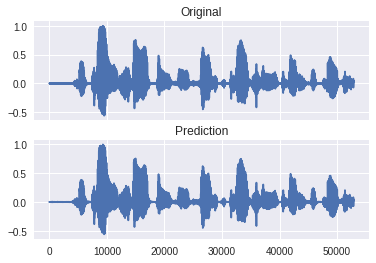

In [153]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.io import wavfile as wf

spf_resynth = wf.read('../expt_MVP/resynth/arctic_a0009_reconstructed.wav')
audio_resynth = spf_resynth[1]

spf_test = wf.read('../expt_MVP/test/arctic_a0009_reconstructed.wav')
audio_test = spf_resynth[1]

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(audio_resynth)
axarr[0].set_title('Original')
axarr[1].plot(audio_test)
axarr[1].set_title('Prediction')




Looks close? Lets see only the first 1024 samples.

Text(0.5,1,u'Prediction')

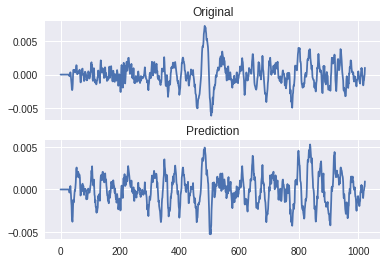

In [154]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.io import wavfile as wf

spf_resynth = wf.read('../expt_MVP/resynth/arctic_a0009_reconstructed.wav')
audio_resynth = spf_resynth[1]

spf_test = wf.read('../expt_MVP/test/arctic_a0009_reconstructed.wav')
audio_test = spf_test[1]

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(audio_resynth[1:1024])
axarr[0].set_title('Original')
axarr[1].plot(audio_test[1:1024])
axarr[1].set_title('Prediction')
